ANN using the Fashion MNIST Dataset

In [1]:
# Sequential model
from tensorflow.keras.models import Sequential, Model
from imgaug import augmenters
from random import randint
# Store or process in the dataframe
import pandas as pd
# Advanced ploting
import seaborn as sns
# To get the ploting graphs
import matplotlib.pyplot as plt
# To calculate numerical analysis
import numpy as np
from numpy import argmax
# Layers
from keras.layers import Dense, Flatten
# Train  the test split
from sklearn.model_selection import train_test_split
#Stoping the training if there is not any improvement within the loss for three consecutive epochs
from keras.callbacks import EarlyStopping
# Metrics for model performance
from sklearn.metrics import classification_report
# Utility functions
from tensorflow.keras.utils import to_categorical


Step 1: Obtain the dataset. The Fashion MNIST dataset from Kaggle is loaded in the current phase. First, it clears the system of any existing Kaggle configuration files and directories. The Kaggle library is then installed with pip. The Kaggle API credentials file (kaggle.json) is then uploaded, allowing access to the Kaggle dataset. The credentials file is saved in the user's home folder's.kaggle directory, and its permissions are modified. Using the Kaggle datasets download command, the Fashion MNIST dataset is downloaded from Kaggle. Finally, the code unzips the downloaded files and uses the pandas read_csv method to import the train and test datasets.

In [2]:
# If there is any file .kaggle directory remove it or Delete
!rm -r ~/.kaggle

rm: cannot remove '/root/.kaggle': No such file or directory


In [5]:
# Install Kaggle
!pip install -q kaggle

In [6]:
# Upload kaggle.json file to the google colab
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dinushikadodanthenna","key":"c1ceb5fa79325b05cd71c20ec31be028"}'}

In [7]:
# Save the file in the correct directory
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change permission of the working directory
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
# Download "Fashion MNIST" dataset from the Kaggle
!kaggle datasets download -d zalando-research/fashionmnist

 99% 68.0M/68.8M [00:04<00:00, 20.9MB/s]
100% 68.8M/68.8M [00:04<00:00, 15.6MB/s]


In [9]:
# Extract files from the fashion.zip file
!unzip -n 'fashionmnist.zip'

Archive:  fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [10]:
# Load Data to the working directory
train = pd.read_csv('fashion-mnist_train.csv', sep=',')
test = pd.read_csv('fashion-mnist_test.csv', sep=',')

Data Visulization After Step 1

In [11]:
# Train the Head of dataset
train.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#Test the Head of the dataset
test.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Print the total number of columns and rows within the trained and tested datasets
print("Fashion MNIST train -  rows:",train.shape[0]," columns:", train.shape[1])
print("Fashion MNIST test -  rows:",test.shape[0]," columns:", test.shape[1])

Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


In [14]:
# Create dictionaries for all labeles
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

# Distribution Method and the Implementation to get classes.
def get_classes_distribution(data):
    # Get the the total count for the each label
    label_counts = data["label"].value_counts()

    # Get the total number of samples
    total_samples = len(data)


    # Count the total number of items related to each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

# Get the distribution, for the classes by using training dataset
get_classes_distribution(train)

Pullover            :   6000 or 10.0%
Ankle Boot          :   6000 or 10.0%
Shirt               :   6000 or 10.0%
T-shirt/top         :   6000 or 10.0%
Dress               :   6000 or 10.0%
Coat                :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Bag                 :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Trouser             :   6000 or 10.0%


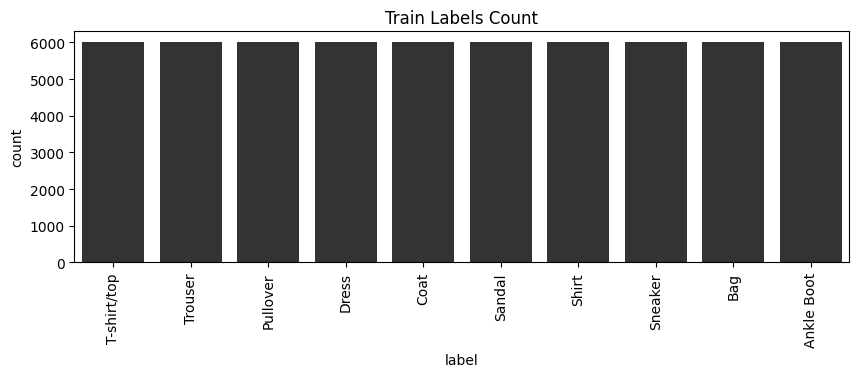

In [15]:
# Plot Labels for the Class Implementation Method for the Training Dataset
def plot_label_per_class(train):
    # Convert trained dataset to the pandas dataframe
    train_df = pd.DataFrame(train)

    # Createing plots
    plt.figure(figsize=(10, 3))
    ax = sns.countplot(x='label', data=train_df, palette=['#333333' for i in range(10)])
    plt.xticks(list(labels.keys()), list(labels.values()), rotation='vertical')
    ax.set_title('Train Labels Count')

    plt.show()

# Visualize class distribution by using training dataset
plot_label_per_class(train)

In [16]:
# Calculate distribution of the labeles using testing dataset
get_classes_distribution(test)

T-shirt/top         :   1000 or 10.0%
Trouser             :   1000 or 10.0%
Pullover            :   1000 or 10.0%
Dress               :   1000 or 10.0%
Bag                 :   1000 or 10.0%
Shirt               :   1000 or 10.0%
Sandal              :   1000 or 10.0%
Coat                :   1000 or 10.0%
Sneaker             :   1000 or 10.0%
Ankle Boot          :   1000 or 10.0%


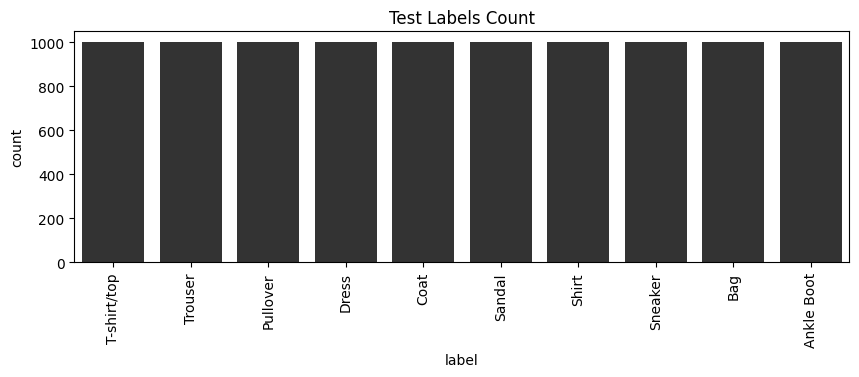

In [17]:
# Plot Label for the each Class Implementation Method for the Testing Dataset
def plot_label_per_class(test):
    test_df = pd.DataFrame(test)

    # Createing the plot
    plt.figure(figsize=(10, 3))
    ax = sns.countplot(x='label', data=test_df, palette=['#333333' for i in range(10)])
    plt.xticks(list(labels.keys()), list(labels.values()), rotation='vertical')
    ax.set_title('Test Labels Count')

    plt.show()

# Visualize class distribution by using testing dataset
plot_label_per_class(test)

Step 2: Preparing the data The Fashion MNIST dataset is preprocessed in this step. Using Pandas, the picture data and labels are retrieved from the train and test datasets first. The photos are then moulded into a 28x28 pixel format after being flattened into a 1D array of 784 pixels. By dividing each pixel value by 255, the pixel values are normalised to the range 0 to 1. This rescales the pixel values to a range acceptable for neural network training. Then, using an 80-20 split, divide the data into training and testing sets.

In [18]:
# Rescale to image data
train_images = np.array(train.iloc[:, 1:])
train_labels = np.array(train.iloc[:, 0])
test_images = np.array(test.iloc[:, 1:])
test_labels = np.array(test.iloc[:, 0])

In [19]:
# Reshaping images
train_images = train_images.reshape(train_images.shape[0], 784)
test_images = test_images.reshape(test_images.shape[0], 784)

# Fix data type of images and Normalize images
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

Data Visulization After Step 2 (Before Data Spliting)

In [20]:
#View Trained data Images
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
#View Trained Data Labels
train_labels

array([2, 9, 6, ..., 8, 8, 7])

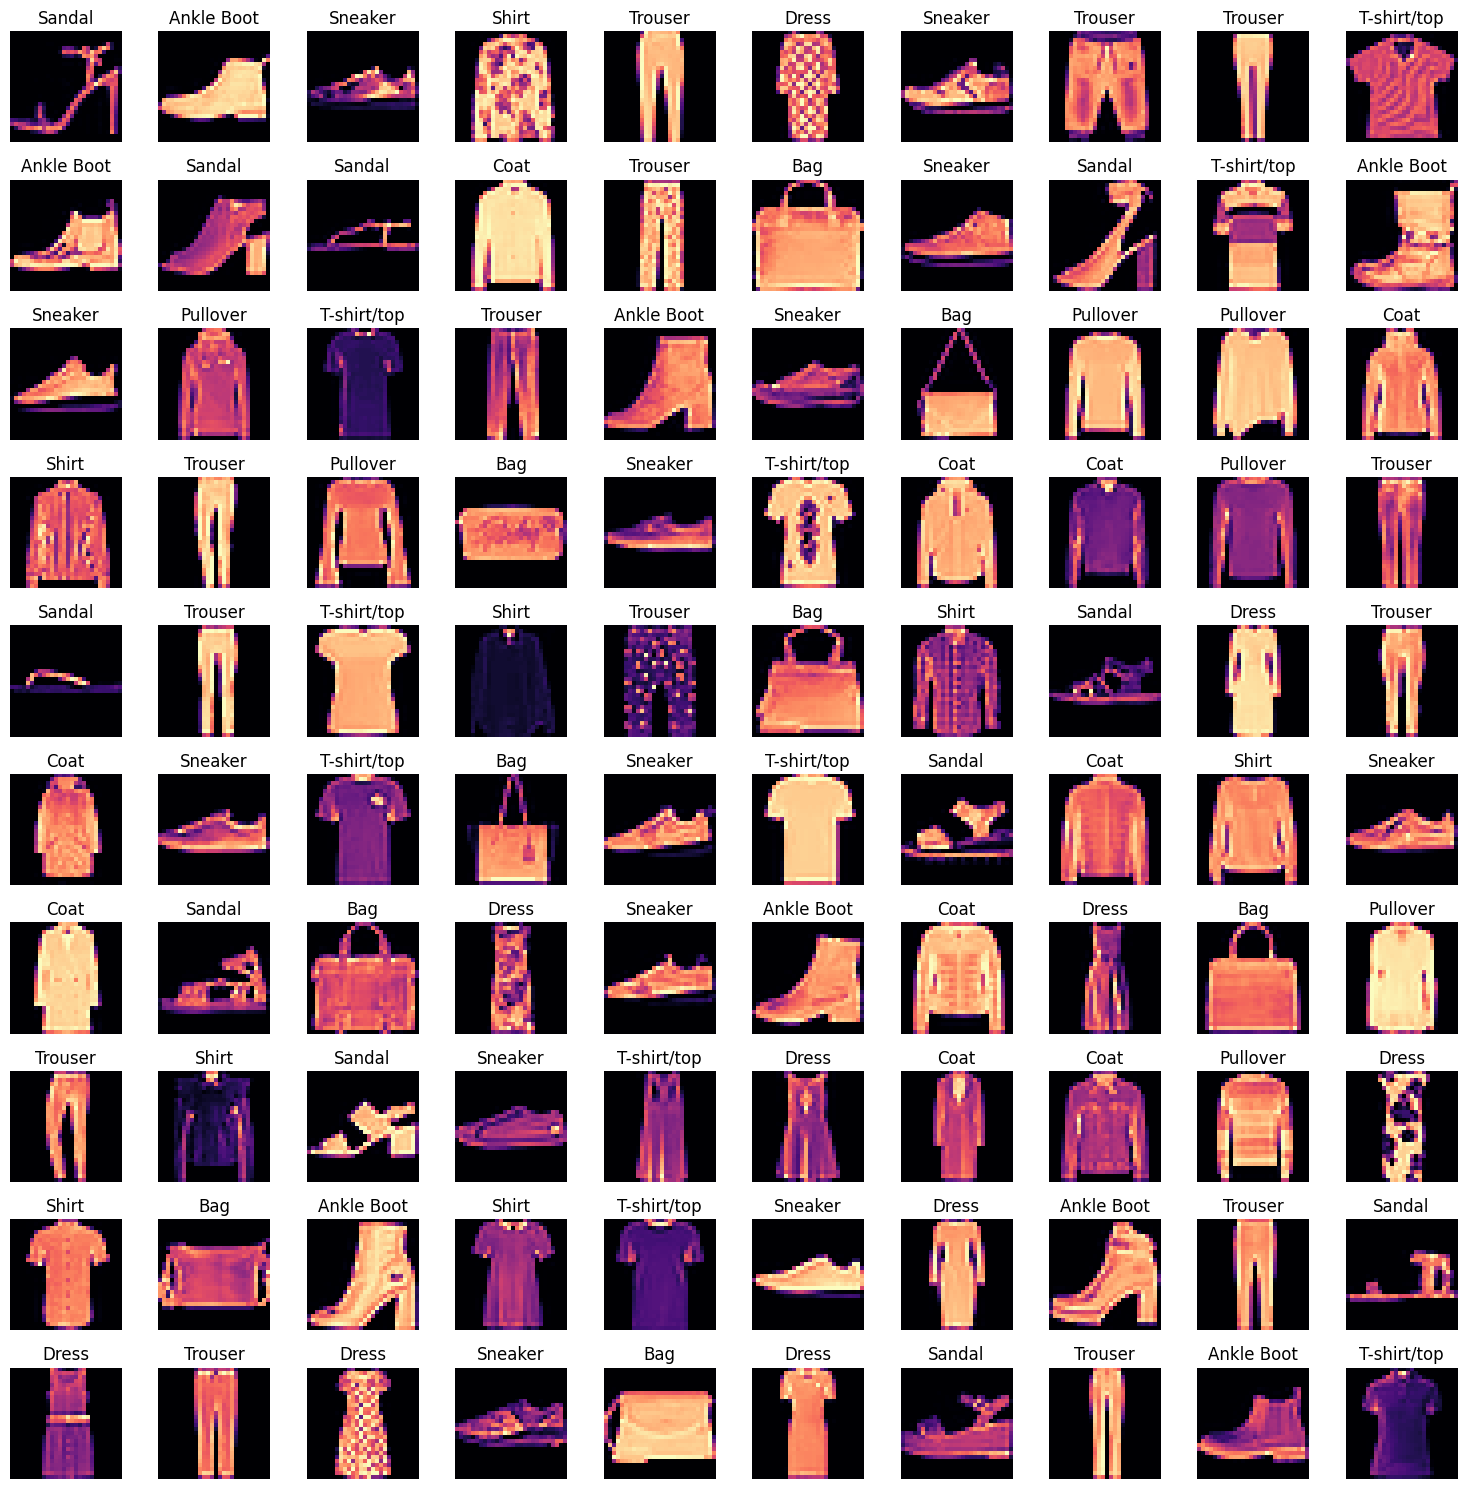

In [22]:
#Data Visualization
#Class Names given from the Dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#First few trained images with their labels
columns = 10
rows = 10
fig = plt.figure(figsize=(15, 15))

for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(train_images))
    img = train_images[data_idx].reshape([28,28])
    label = labels[train_labels[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='magma')
    plt.axis('off')
plt.tight_layout()
plt.show()

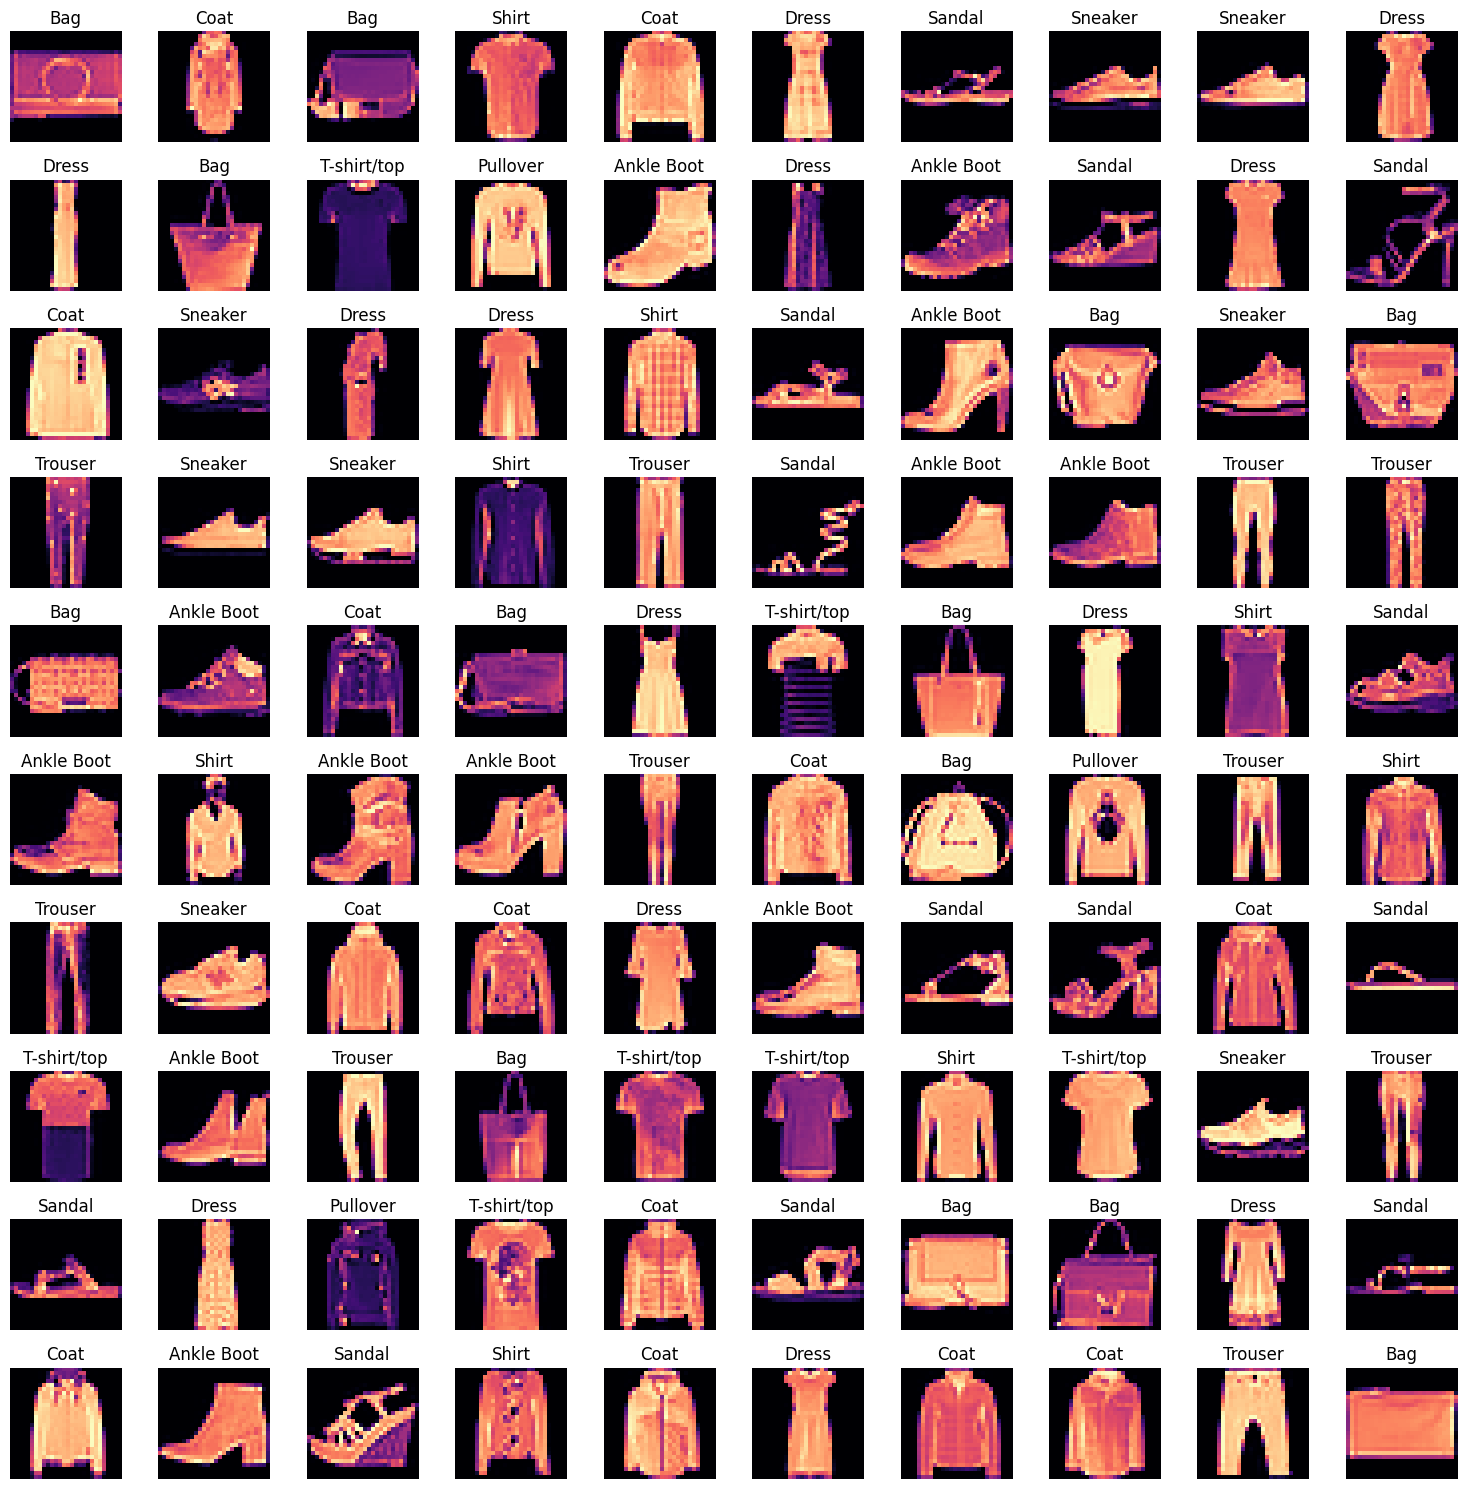

In [23]:
#First few tested images with their labels
columns = 10
rows = 10
fig = plt.figure(figsize=(15, 15))

for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(test_images))
    img = test_images[data_idx].reshape([28, 28])
    label = labels[test_labels[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='magma')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [24]:
# Split data into two sections, named training and testing.
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

Step 3: Create the ANN Model The architecture of the ANN (Artificial Neural Network) model is defined in this step. The model comprises three dense layers, each with 128, 64, and 10 neurons. The model's input shape is (784,), which is the flattened version of the Fashion MNIST photos. The first layer is a Flatten layer, which converts the input photos to a 1D array. The following two layers are dense layers with 128 and 64 neurons, with the activation function set to'relu'. The final layer is a dense layer with 10 neurons, reflecting the 10 classes of the Fashion MNIST dataset, and the activation function is set to 'softmax'.

In [25]:
#Model Parameters
INPUT_SHAPE = (784,)
BATCH_SIZE = 128
EPOCHS = 25
VERBOSE = 2

In [26]:
# Create the model
model = Sequential([
    Flatten(input_shape=INPUT_SHAPE),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

Step 4: Model Training and Evaluation The model parameters such as batch size, epochs, and verbosity are defined first in this step. The optimizer, loss function, and evaluation metric are then applied to the model. The model summary is printed to provide a high-level overview of the model design. When the observed validation loss does not improve after a specific number of epochs (patience), the EarlyStopping callback is utilised to stop the model training. The model is then trained on the training dataset using the fit() function with the batch size, number of epochs, and verbosity supplied. The fit function additionally receives the EarlyStopping callback as a parameter. Finally, the model is tested on the testing dataset using the evaluate() function, which outputs the model's loss and accuracy. The test loss and accuracy are printed to show how well the model performs on unknown data.



In [27]:
# Model training
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
#View the Summary of the model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# Stop training to avoid overtraining.
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [30]:
# Model Fitting
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=VERBOSE, callbacks=[early_stopping], validation_data=(X_test, y_test))

Epoch 1/25
375/375 - 7s - loss: 0.5733 - accuracy: 0.8012 - val_loss: 0.4413 - val_accuracy: 0.8361 - 7s/epoch - 18ms/step
Epoch 2/25
375/375 - 1s - loss: 0.4104 - accuracy: 0.8554 - val_loss: 0.3930 - val_accuracy: 0.8568 - 1s/epoch - 3ms/step
Epoch 3/25
375/375 - 1s - loss: 0.3695 - accuracy: 0.8673 - val_loss: 0.3927 - val_accuracy: 0.8529 - 1s/epoch - 3ms/step
Epoch 4/25
375/375 - 1s - loss: 0.3401 - accuracy: 0.8768 - val_loss: 0.3573 - val_accuracy: 0.8673 - 1s/epoch - 3ms/step
Epoch 5/25
375/375 - 1s - loss: 0.3230 - accuracy: 0.8827 - val_loss: 0.3410 - val_accuracy: 0.8788 - 1s/epoch - 3ms/step
Epoch 6/25
375/375 - 1s - loss: 0.3057 - accuracy: 0.8873 - val_loss: 0.3305 - val_accuracy: 0.8817 - 1s/epoch - 3ms/step
Epoch 7/25
375/375 - 1s - loss: 0.2919 - accuracy: 0.8927 - val_loss: 0.3230 - val_accuracy: 0.8830 - 1s/epoch - 3ms/step
Epoch 8/25
375/375 - 1s - loss: 0.2841 - accuracy: 0.8952 - val_loss: 0.3252 - val_accuracy: 0.8749 - 1s/epoch - 3ms/step
Epoch 9/25
375/375 - 2s

In [31]:
# By considering testing dataset evaluate the model.
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Loss: {:.2f}%'.format(test_loss*100))
print('Test Accuracy: {:.2f}%'.format(test_acc*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.3311 - accuracy: 0.8814
Test Loss: 33.11%
Test Accuracy: 88.14%


Data Visulization After Step 3 and 4

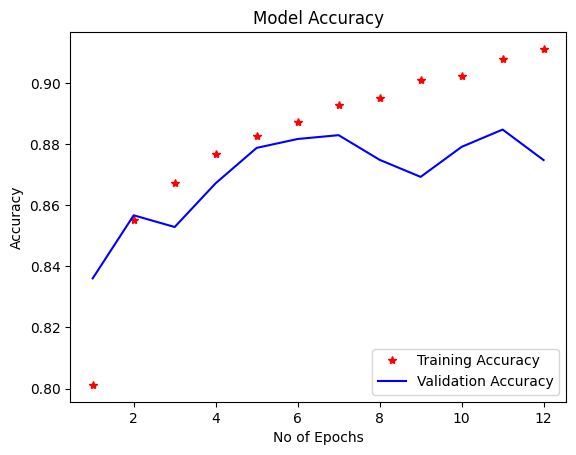

In [32]:
# Data Visualization
# Plot graphs to get the accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r*', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig('./ann_accuracy_plot.png')
plt.show()

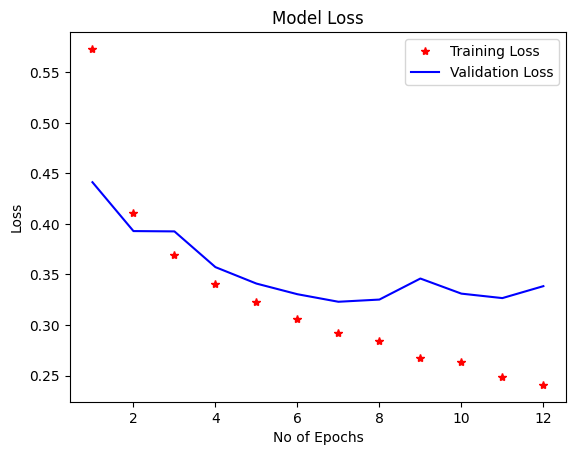

In [33]:
# Data Visualization
# Plot graphs for loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'r*', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.savefig('./ann_loss_plot.png')
plt.show()

In [34]:
# Predicted values
y_pred = model.predict(X_test)

# Decoding the predicted labels
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred, target_names=class_names))

375/375 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.78      0.82      1232
     Trouser       0.99      0.96      0.98      1174
    Pullover       0.86      0.73      0.79      1200
       Dress       0.82      0.94      0.88      1242
        Coat       0.69      0.88      0.77      1185
      Sandal       0.97      0.95      0.96      1141
       Shirt       0.75      0.66      0.70      1243
     Sneaker       0.96      0.91      0.94      1224
         Bag       0.97      0.97      0.97      1149
  Ankle boot       0.92      0.98      0.95      1210

    accuracy                           0.87     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.87      0.87     12000



<ipython-input-35-00776226b679>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6, 6, ind+1)


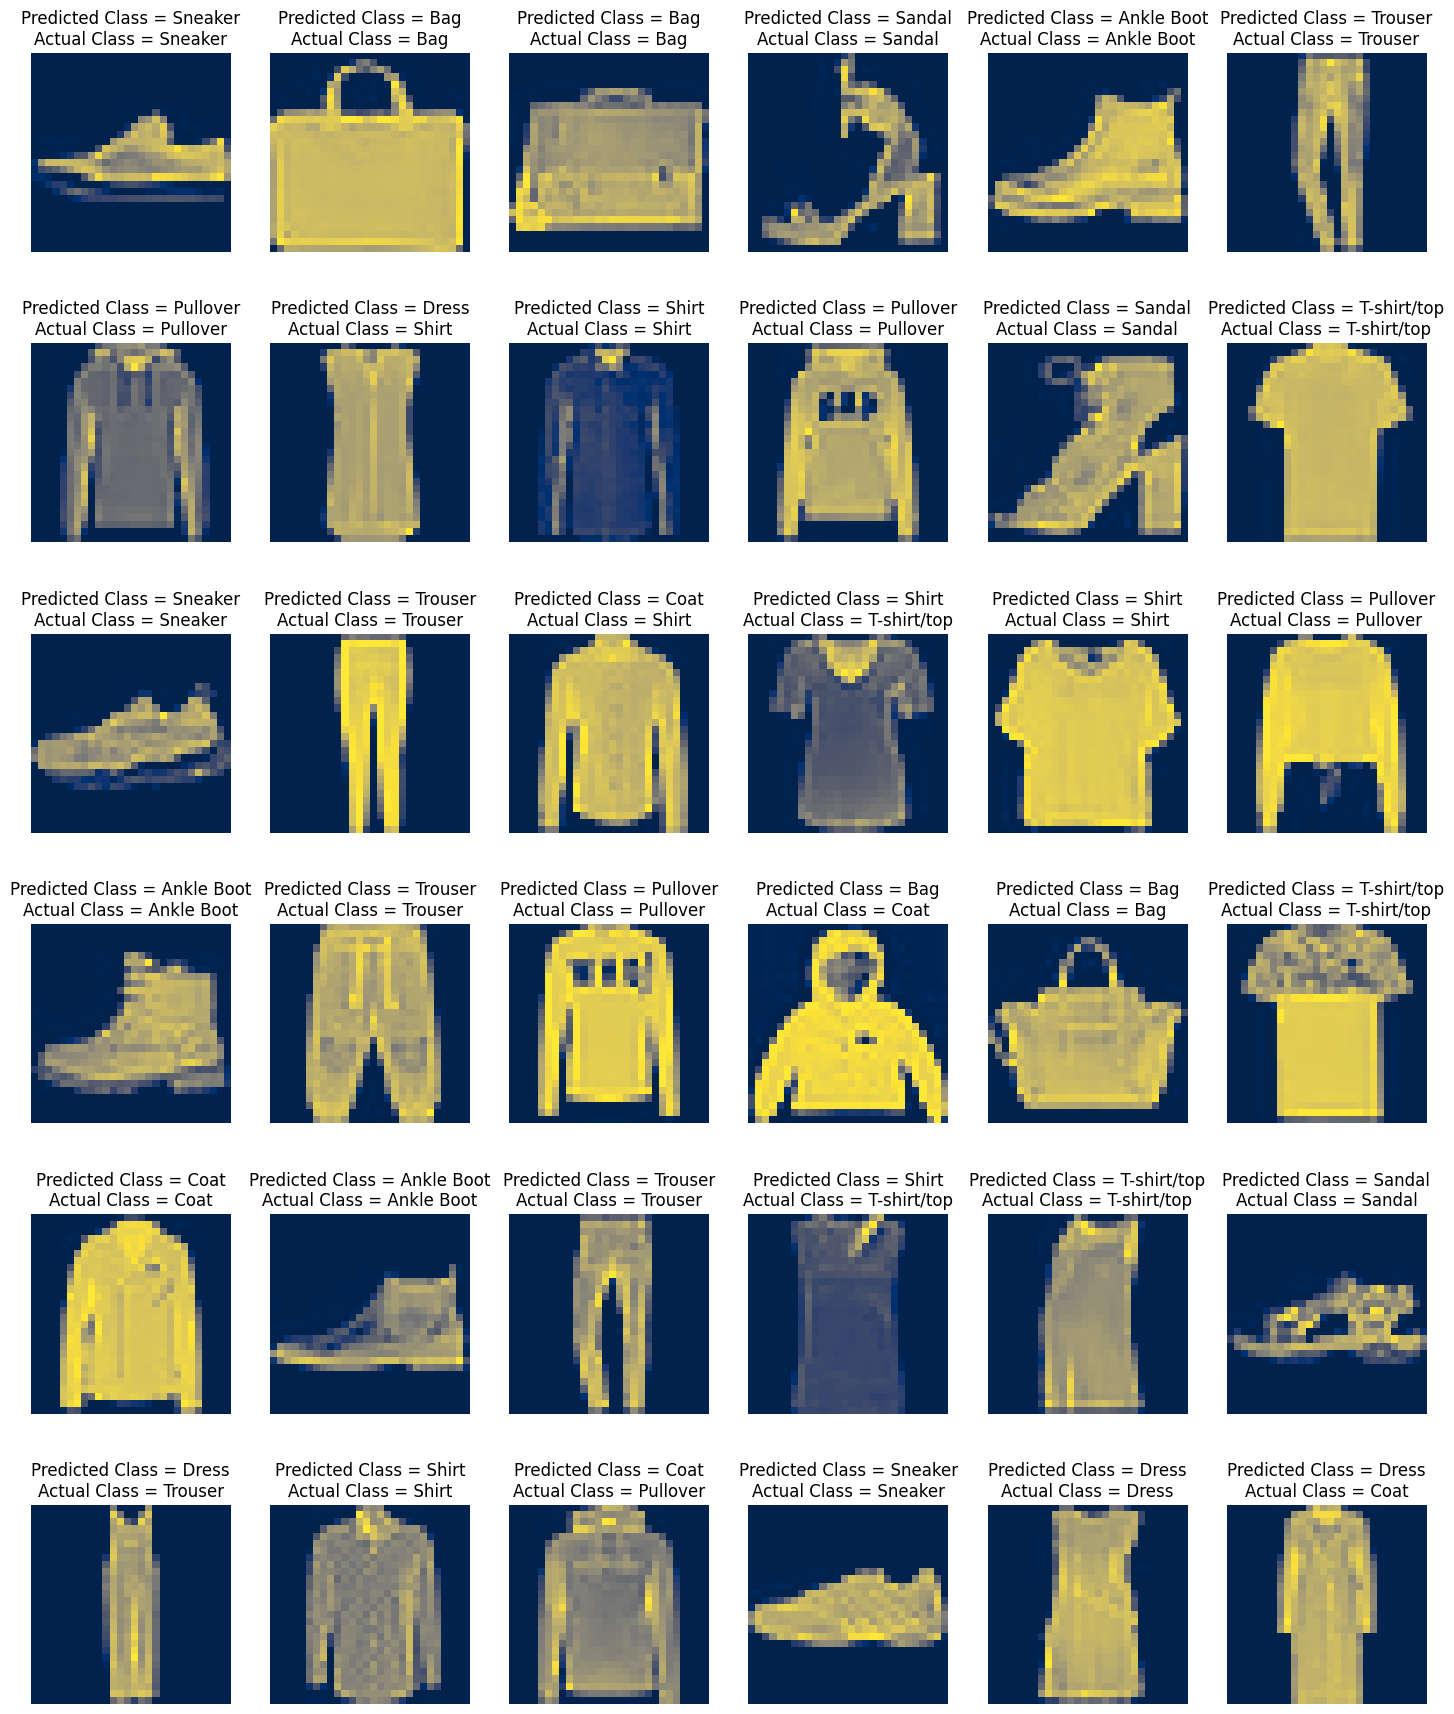

In [35]:
# Each image's predicted target
fig, ax = plt.subplots(figsize=(18, 22))
for ind, row in enumerate(X_test[:36]):
    plt.subplot(6, 6, ind+1)
    plt.title('Predicted Class = ' + labels[y_pred[ind]] + '\n' + 'Actual Class = ' + labels[y_test[ind]])
    img = row.reshape(28, 28)
    plt.axis('off')
    plt.savefig('./ann_predicted_target_images.png')
    plt.imshow(img, cmap='cividis')